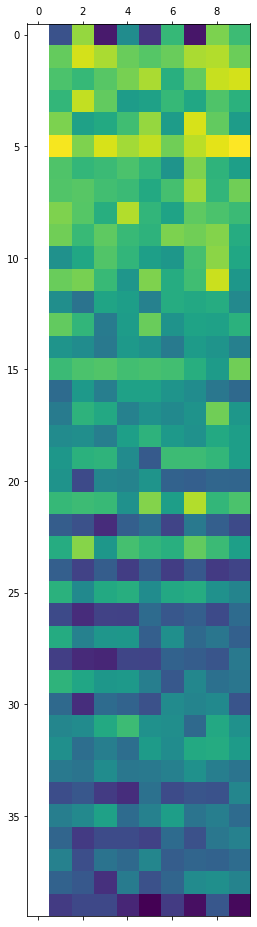

[[-1.26575680e+00]
 [ 1.55076164e+00]
 [-2.12795633e+00]
 [-1.44897420e-01]
 [-1.72559655e+00]
 [ 7.17302104e-01]
 [-2.18543629e+00]
 [ 1.34958176e+00]
 [ 8.03522057e-01]
 [ 1.17714185e+00]
 [ 1.98186141e+00]
 [ 1.69446156e+00]
 [ 1.20588183e+00]
 [ 1.03344193e+00]
 [ 1.20588183e+00]
 [ 1.69446156e+00]
 [ 1.75194153e+00]
 [ 1.23462182e+00]
 [ 9.47221977e-01]
 [ 7.17302104e-01]
 [ 1.06218191e+00]
 [ 1.32084177e+00]
 [ 1.69446156e+00]
 [ 5.44862199e-01]
 [ 1.14840187e+00]
 [ 1.89564145e+00]
 [ 1.98186141e+00]
 [ 6.88562120e-01]
 [ 1.86690147e+00]
 [ 1.14840187e+00]
 [ 1.71242406e-01]
 [ 2.57462358e-01]
 [ 7.17302104e-01]
 [ 3.72422294e-01]
 [ 9.75961961e-01]
 [ 5.73602183e-01]
 [ 1.34958176e+00]
 [ 2.57462358e-01]
 [ 4.29902263e-01]
 [ 8.32262041e-01]
 [ 1.55076164e+00]
 [ 1.71242406e-01]
 [ 2.01060139e+00]
 [ 1.14840187e+00]
 [ 1.71242406e-01]
 [ 2.24052126e+00]
 [ 1.37832174e+00]
 [ 2.01060139e+00]
 [ 1.63698160e+00]
 [ 1.86690147e+00]
 [ 1.26336180e+00]
 [ 1.80942150e+00]
 [ 2.0968213

NameError: name 'sample' is not defined

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler

def stack(filepath):  # return 3D microbump raw image
    s = 0
    total = 0
    for i in range(1000):
        n = str(i+1)
        img = cv2.imread(filepath + n + '.tiff', 0)  # 原始檔讀取
        if img is None:  # filename unreachable
            continue
        total += 1
    count = 0
    for i in range(1000):
        n = str(i+1)
        img = cv2.imread(filepath + n + '.tiff', 0)  # 原始檔讀取
        if img is None:  # filename unreachable
            continue
        if count == 0:
            s = np.empty((img.shape[0], img.shape[1], total))
            s[:, :, count] = np.array(img)
        else:
            s[:, :, count] = np.array(img)
        count += 1
    return s


def area_append():
    a1 = np.load('N38_structure_a1.npy')
    a2 = np.load('N38_structure_a2.npy')
    a3 = np.load('N38_structure_a3.npy')
    a4 = np.load('N38_structure_a4.npy')
    validate = np.array([])
    for i in range(100):
        if i % 10 != 0:
            validate = np.append(validate, [int(i)], axis=0)
    validate = validate.astype(np.int)
    print(validate)
    all = np.concatenate((a1[validate, :, :, :, :],a2[validate, :, :, :, :],
                          a3[validate, :, :, :, :],a4[validate, :, :, :, :]), axis=0)
    print(all.shape)
    np.save('N38_structure_initial.npy', all)
    
    
def train_val(filename1, filename2):
    input = np.load(filename1)
    target = np.load(filename2)
    plt.matshow(target)
    plt.show()
    target = target[:, 1:]
    target = target.flatten().reshape(-1, 1)
    scaler = StandardScaler()
    input, target = normalize(input), scaler.fit_transform(target)
    print(target)
    print(scaler.mean_, scaler.var_)
    return 0
    rnd = np.arange(input.shape[0])
    np.random.shuffle(rnd)
    input = input[rnd, :, :, :, :]
    target = target[rnd]
    x_train, x_val = input[:int(input.shape[0]*0.8), :, :, :, :], input[int(input.shape[0]*0.8):, :, :, :, :]
    y_train, y_val = target[:int(input.shape[0]*0.8)], target[int(input.shape[0]*0.8):]
    np.save('N38_initial_x_train.npy', x_train)
    np.save('N38_initial_y_train.npy', y_train)
    np.save('N38_initial_x_val.npy', x_val)
    np.save('N38_initial_y_val.npy', y_val)
    
    
def normalize(volume):
    min = np.min(volume)
    max = np.max(volume)
    volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
    return volume


def main():
    train_val('N38_structure_initial.npy', 'N38_initial.npy')
#     area = stack('N38_area4_initial/')  # read file
#     print(area.shape)
#     bump = np.empty((100, 1, 60, 60, 60))  # split into bump by bump
#     count = 0  # the number of microbump
#     start = 0
#     end = 0
#     sample = 0
#     structure_check = []
#     for depth in range(area.shape[2]):
#         pres = np.sum(area[:, 6:-6, depth])
#         if pres > 0 and start == 0:
#             start = depth
#         elif start != 0 and pres == 0:
#             end = depth
#         if start != 0 and end != 0:
#             if (end - start) < 40:
#                 start, end = 0, 0
#                 structure_check.append(0)
#                 continue
#             structure_check.append(1)
#             line = area[:, 6:-6, start:end]
#             print(line.shape)
#             head = 0
#             tail = 0
#             for length in range(line.shape[0]):
#                 obj = np.sum(line[length, :, :])
#                 if obj > 0 and head == 0:
#                     head = length
#                 elif head != 0 and obj == 0:
#                     tail = length
#                 if head != 0 and tail != 0:
#                     if (tail - head) < 30:
#                         head, tail = 0, 0
#                         continue
#                     m1 = (tail+head)//2
#                     m2 = (end+start)//2
#                     unit = area[m1-30:m1+30, :, m2-30:m2+30]
#                     print(unit.shape)
#                     origin = (60-unit.shape[1])//2
#                     bump[count, :, :, origin:origin+unit.shape[1], :] = unit
#                     count += 1
#                     sample += 1
#                     head, tail = 0, 0
#                     continue
#             start, end = 0, 0
#             continue
#     np.save('N38_structure_a4.npy', bump)
    print(sample)
    print(structure_check)
    
    
if __name__ == '__main__':
    main()